In [1]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier

In [11]:
def analyzer(max_depth):
    # Load the data
    data = pd.read_csv('Social_Network_Ads.csv')
    
    # Corrected the feature selection (should be columns 0 and 1 for Age and EstimatedSalary)
    x = data.iloc[:, 0:2].values  # Using Age (column 0) and EstimatedSalary (column 1)
    y = data.iloc[:, -1].values   # Purchased (column 2)

    # Create and train the classifier
    clf = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
    clf.fit(x, y)

    # Create meshgrid for visualization
    # Fixed the stop value for 'b' to use x[:, 1].max() instead of x[:, 0].max()
    a = np.arange(start=x[:, 0].min()-1, stop=x[:, 0].max()+1, step=0.1)
    b = np.arange(start=x[:, 1].min()-1000, stop=x[:, 1].max()+1000, step=1000)  # Larger step for salary
    
    xx, yy = np.meshgrid(a, b)
    input_array = np.array([xx.ravel(), yy.ravel()]).T
    
    # Predict and reshape
    labels = clf.predict(input_array)
    
    # Plotting
    plt.figure(figsize=(10, 6))
    plt.contourf(xx, yy, labels.reshape(xx.shape), alpha=0.5)
    plt.scatter(x[:, 0], x[:, 1], c=y, edgecolor='k')
    plt.xlabel('Age')
    plt.ylabel('Estimated Salary')
    plt.title(f'Decision Tree Classification (max_depth={max_depth})')
    plt.show()

# Example usage:
# analyzer(3)

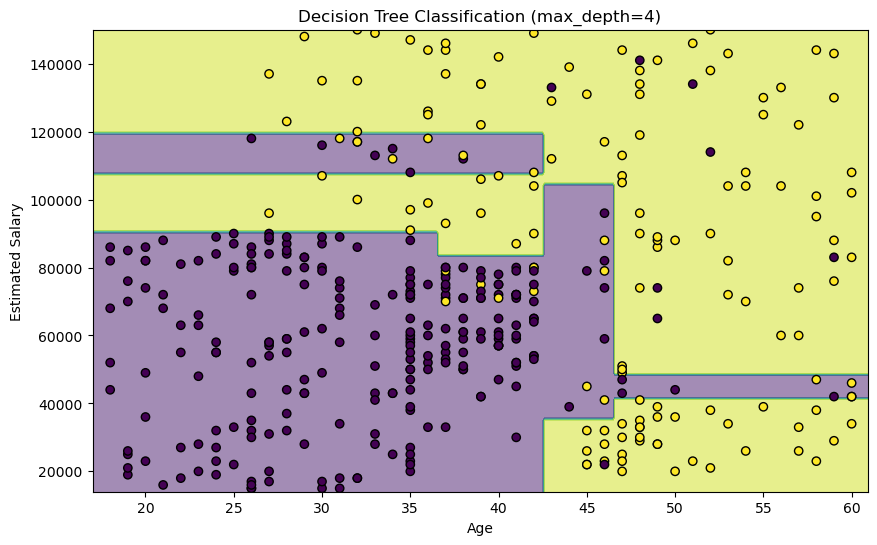

In [19]:
analyzer(max_depth=4)